<a href="https://colab.research.google.com/github/MianUsmanAhmed12/lab6/blob/main/Lab_6_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
n_samples = 15000 # no.of.data points 

# The dataset function is avialable in sklearn package
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1) # Generate Moon Toy Dataset
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05) # Generate Circle Toy Dataset

# noisy_moons.shape
# moon_labels.shape

In [3]:
# Put in Array
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

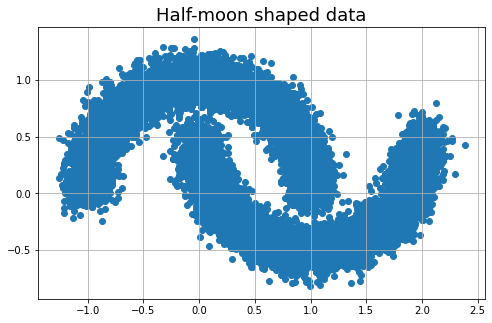

In [4]:
# Plot Half-moon data
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.savefig('HALF_MOON.png', dpi=300)
plt.show()

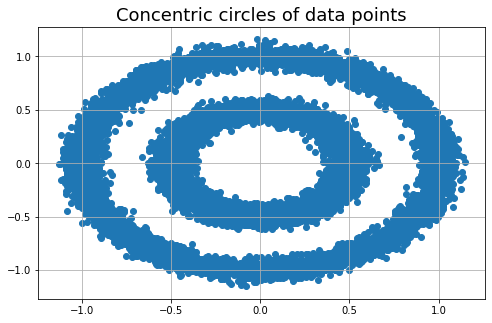

In [5]:
# Plot Circle data
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.savefig('CIRCLE.png', dpi=300)
plt.show()



```
# This is formatted as code
```

## K-Means Clustering

 k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum
K-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

In [6]:
# Fit K-Means Clustering on noise moon data
km=cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)
km.labels_

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [7]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.189
Silhouette Coefficient: 0.486


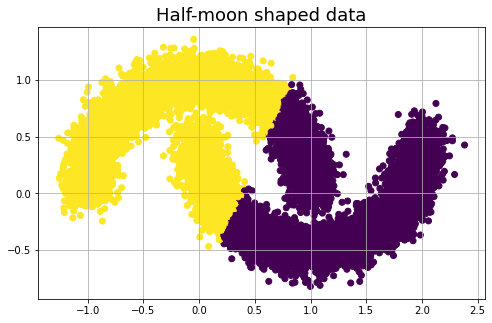

In [8]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.savefig('CLUSTER_MOON.png', dpi=300)
plt.show()

In [9]:
# Fit K-Means Clustering on noise Circle data
km.fit(noisy_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.353


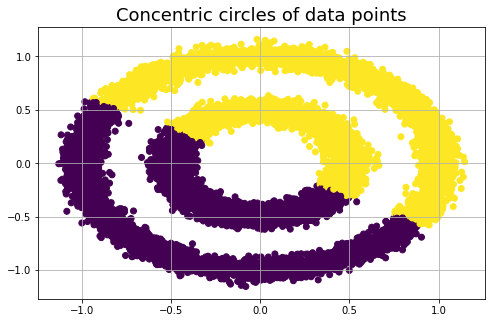

In [12]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.savefig('CLUSTER_CIRCLE.png', dpi=300)
plt.show()

###  Disadvanatges of K-Means Clustering

##### 1) Difficult to predict K-Value.
##### 2) With global cluster, it didn't work well.
##### 3) Different initial partitions can result in different final clusters.

## DBSCAN 

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

In [ ]:
# Fit DBSCAN Clustering on noise moon data
dbs = cluster.DBSCAN(eps=0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

NameError: ignored

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.savefig('DBSCAN_MOON.png', dpi=300)
plt.show()

NameError: ignored

In [ ]:
# Fit DBSCAN Clustering on noise Circle data
dbs.fit(noisy_circles)
dbs.labels_

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.savefig('BSCAN_CIRCLE.png', dpi=300)
plt.show()

# PCA on Moon Data

In [13]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

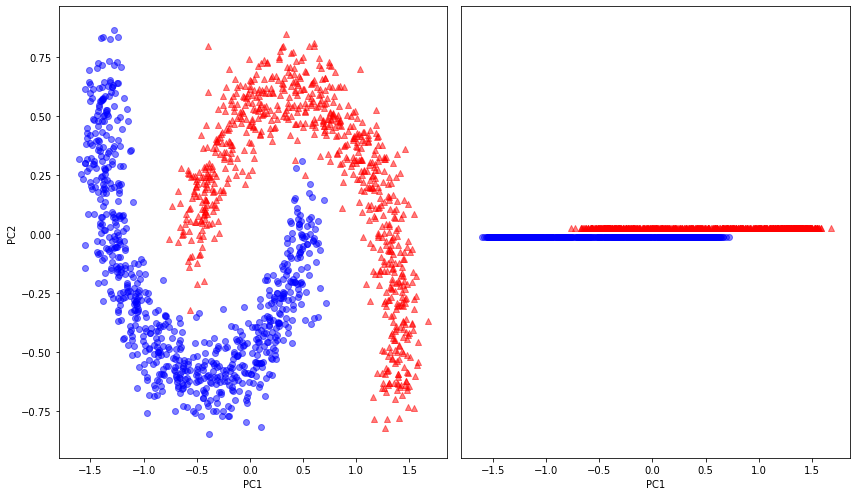

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.savefig('PCA_MOON.png', dpi=300)
plt.show()

          0         1
0  1.000000 -0.437372
1 -0.437372  1.000000


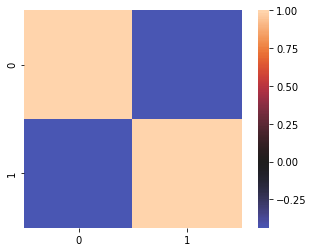

In [ ]:
# Compute the correlation matrix before doing PCA
nm=pd.DataFrame(noisy_moons)
pca_corr=nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
plt.savefig('CORR_PCA.png', dpi=300)

              0             1
0  1.000000e+00  2.027256e-17
1  2.027256e-17  1.000000e+00


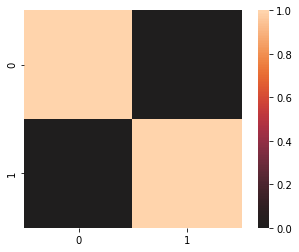

In [15]:
# Compute the correlation matrix after doing PCA
nmp=pd.DataFrame(noisy_moons_spca)
corr_pca=nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
plt.savefig('PCA_CORR.png', dpi=300)

In [16]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00 -1.371946e-16
1 -1.371946e-16  1.000000e+00


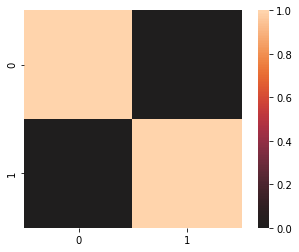

In [17]:
# Compute the correlation matrix after doing PCA

kmp=pd.DataFrame(noisy_moons_kpca)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig('KPCA_CORR.png', dpi=300)

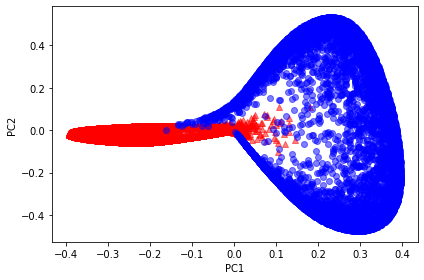

In [18]:
plt.scatter(noisy_moons_kpca[moon_labels == 0, 0], noisy_moons_kpca[moon_labels == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(noisy_moons_kpca[moon_labels == 1, 0], noisy_moons_kpca[moon_labels == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('KPCA_MOON.png', dpi=300)

# Outlier detection

In [19]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0


14850
150


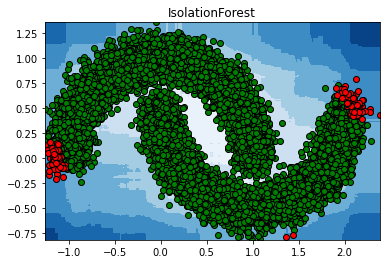

In [20]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_MOON.png', dpi=300)
print(pos.sum())
print(neg.sum())

In [21]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

14850
150


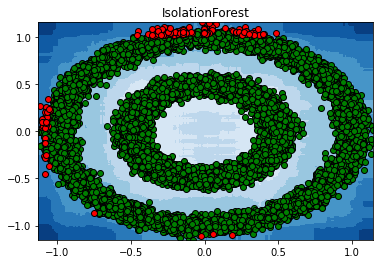

In [22]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500), 
                     np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_CIRCLE.png', dpi=300)
print(pos.sum())
print(neg.sum())

# Clustering and PCA on wine Dataset

In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.tail()
#df_wine.to_csv('WindeData.csv')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


## Task 1: Check the counts of each wine class

In [24]:
print(df_wine['Class label'].value_counts())
# Write your code here

2    71
1    59
3    48
Name: Class label, dtype: int64


In [25]:

# Fetch data into x and y variables
x=df_wine.iloc[:,1:14] # Covariates or input
y=df_wine.iloc[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Index(['Class label'], dtype='object')


## Task 2: Cluster the data using K Means Algorithm

In [26]:
km=cluster.KMeans(n_clusters=3)
km.fit(x)


km.labels_ = km.predict(x)
print(km.labels_)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


## Task 3: Scatter plot the data into 3 classes based on True lables and plot with legends. 


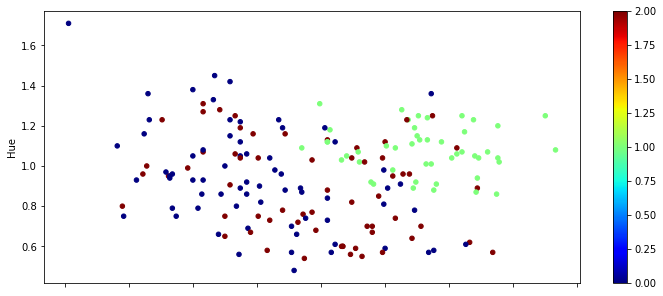

In [27]:
# Get help from https://sweetcode.io/k-means-clustering-python/ ..Understood the code and then implemented on different 
#variable for different plot
df_wine.plot.scatter(x = 'Alcohol', y = 'Hue', c= km.labels_, figsize=(12,5), colormap='jet')



## Task 4: Use cluster model labels to group them in predicted classes

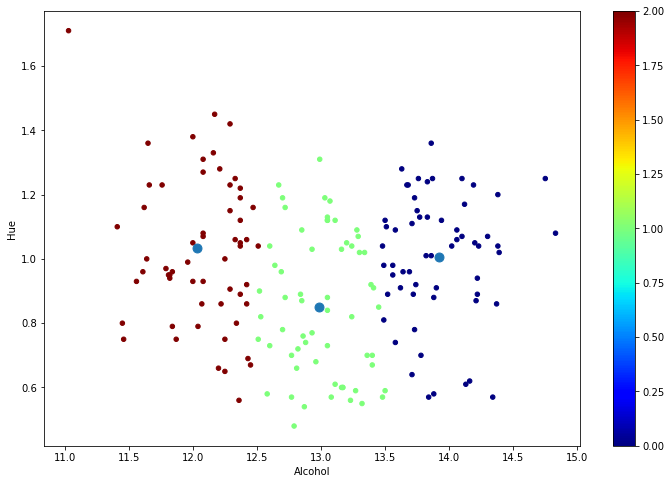

In [28]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(df_wine.iloc[:,[11,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(df_wine.iloc[:,[11,1]].columns.values))
fig, ax = plt.subplots(1, 1)
df_wine.plot.scatter(x = 'Alcohol', y = 'Hue', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'Hue', ax = ax,  s = 80, mark_right=False)


In [32]:
# Now we have splitted the data into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [33]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [34]:
# Standardizing the data
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Dimensionality reduction: Principal component analysis using scikit-learn

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

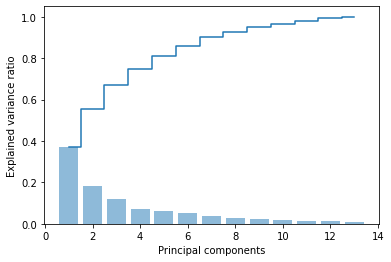

In [37]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

## Task 5: Apply PCA with `n_components=2` on `X_train_std` data and transform test data accordingly

In [38]:
# Complete this code for task 5
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std )

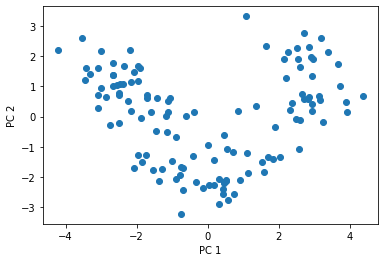

In [39]:
# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

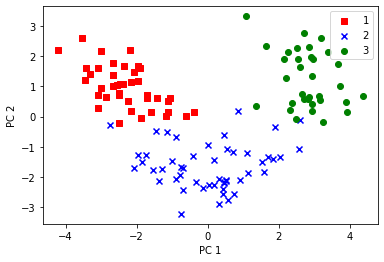

In [40]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

###  Training logistic regression classifier using the first 2 principal components.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


## Task 6: Apply Logistic Regression on training features and predict test features



In [43]:
# Task 6: Complete the code below and fill the code for plot in the cell given below:
lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train ) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 92.592593


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


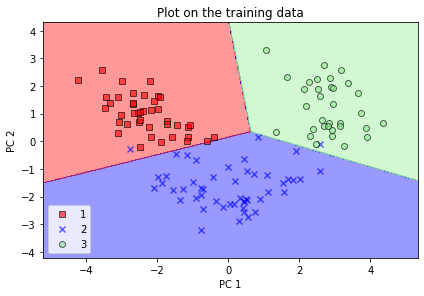

In [44]:
# Plot the decision region on training features and test labels using classifier you have trained above
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


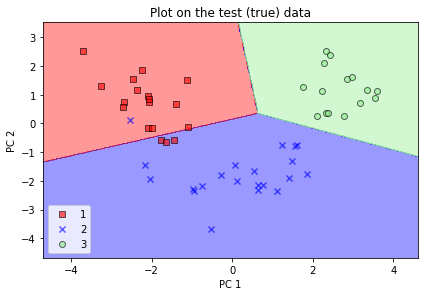

In [45]:
#  Plot the decision region on test features and true labels using classifier you have trained above
plot_decision_regions(X_test_pca,y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


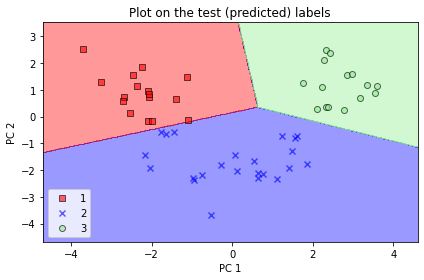

In [46]:
#  Plot the decision region on test features and predicted labels using classifier you have trained above
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()

In [ ]:
#Task 7 in other file task_7 

In [48]:
#help taken from https://www.kaggle.com/ashydv/country-clustering-hierarchical-clustering-pca

import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [49]:
df = pd.DataFrame(pd.read_csv('Country-data.csv'))
df.head(5)


FileNotFoundError: ignored

In [ ]:
#167 countries having 10 columns for evaluation
df.shape

(167, 10)

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


[Text(0.5, 0, 'Child Mortality Rate'), Text(0, 0.5, '')]

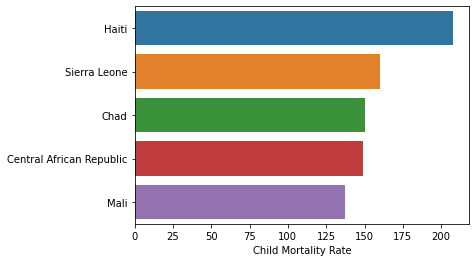

In [ ]:
top5_cm = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(5)
plt = sns.barplot(x='child_mort', y='country', data= top5_cm)
plt.set(xlabel = 'Child Mortality Rate', ylabel= '')

[Text(0.5, 0, 'Fertility Rate'), Text(0, 0.5, '')]

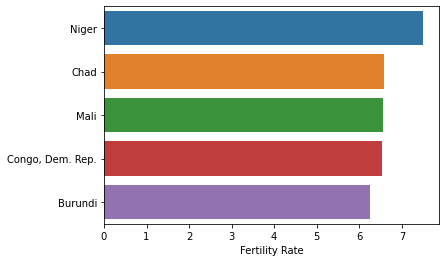

In [ ]:
top5_tf = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(5)
plt1 = sns.barplot(x='total_fer', y='country', data= top5_tf)
plt1.set(xlabel = 'Fertility Rate', ylabel= '')

[Text(0.5, 0, 'Life Expectancy'), Text(0, 0.5, '')]

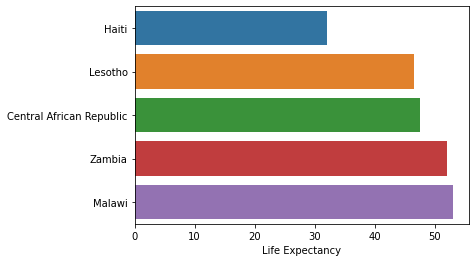

In [ ]:
bottom5_le = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(5)
plt1 = sns.barplot(y='country', x='life_expec', data= bottom5_le)
plt1.set(xlabel = 'Life Expectancy', ylabel= '')

[Text(0.5, 0, 'Health'), Text(0, 0.5, '')]

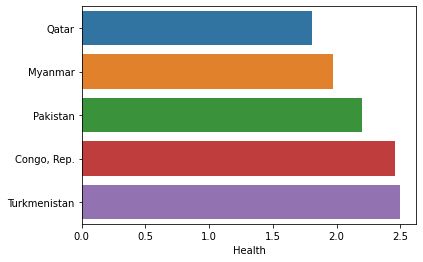

In [ ]:
bottom5_h = data[['country','health']].sort_values('health', ascending = True).head(5)
plt1 = sns.barplot(x='health', y='country', data= bottom5_h)
plt1.set(xlabel = 'Health', ylabel= '')

[Text(0.5, 0, 'GDP per capita'), Text(0, 0.5, '')]

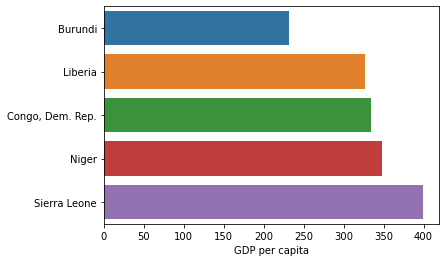

In [ ]:
bottom5_gdp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(5)
plt1 = sns.barplot(x='gdpp', y='country', data= bottom5_gdp)
plt1.set(xlabel = 'GDP per capita', ylabel= '')


[Text(0.5, 0, 'Per capita Income'), Text(0, 0.5, '')]

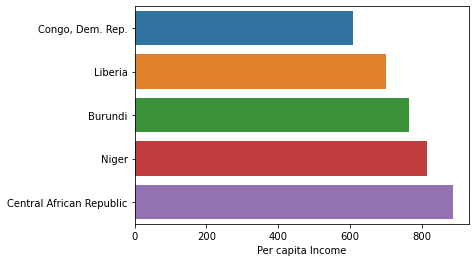

In [ ]:
bottom5_income = data[['country','income']].sort_values('income', ascending = True).head(5)
plt1 = sns.barplot(x='income', y='country', data= bottom5_income)
plt1.set(xlabel = 'Per capita Income', ylabel= '')

[Text(0.5, 0, 'Inflation'), Text(0, 0.5, '')]

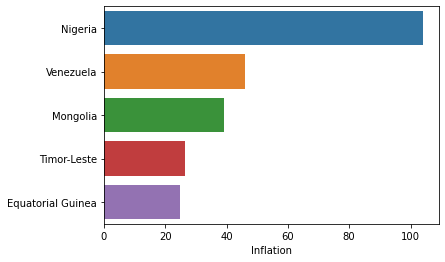

In [ ]:
top5_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(5)
plt1 = sns.barplot(x='inflation', y='country', data= top5_inflation)
plt1.set(xlabel = 'Inflation', ylabel= '')

[Text(0.5, 0, 'Exports'), Text(0, 0.5, '')]

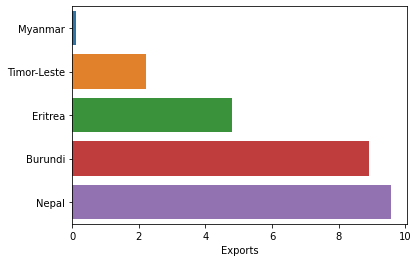

In [ ]:
bottom5_exports = data[['country','exports']].sort_values('exports', ascending = True).head(5)
plt1 = sns.barplot(x='exports', y='country', data= bottom5_exports)
plt1.set(xlabel = 'Exports', ylabel= '')

[Text(0.5, 0, 'Imports'), Text(0, 0.5, '')]

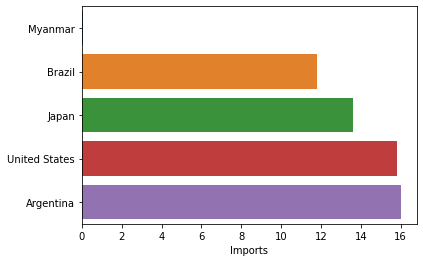

In [ ]:
bottom5_imports = data[['country','imports']].sort_values('imports', ascending = True).head(5)
plt1 = sns.barplot(x='imports', y='country', data= bottom5_imports)
plt1.set(xlabel = 'Imports', ylabel= '')


In [ ]:

data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:


percentiles = data_help['child_mort'].quantile([0.10,0.90]).values
data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.10,0.90]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.10,0.90]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_fer'].quantile([0.10,0.90]).values
data_help['total_fer'][data_help['total_fer'] <= percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['income'].quantile([0.10,0.90]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.10,0.90]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.10,0.90]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['imports'].quantile([0.10,0.90]).values
data_help['imports'][data_help['imports'] <= percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['exports'].quantile([0.10,0.90]).values
data_help['exports'][data_help['exports'] <= percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports'] >= percentiles[1]] = percentiles[1]


In [ ]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])

plt.tight_layout()

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

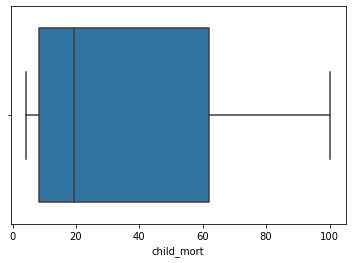

In [ ]:
plt1 = sns.boxplot(data_help['child_mort'])

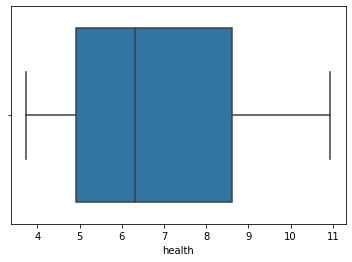

In [ ]:
plt2 = sns.boxplot(data_help['health'])

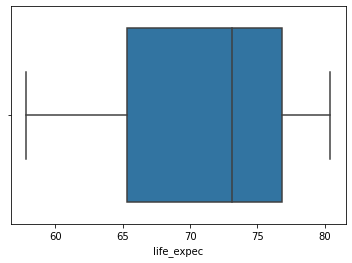

In [ ]:
plt3 = sns.boxplot(data_help['life_expec'])

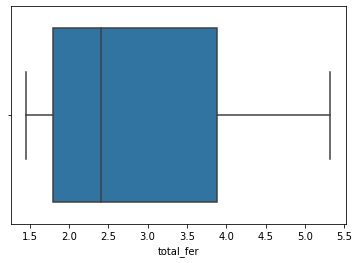

In [ ]:
plt4 = sns.boxplot(data_help['total_fer'])

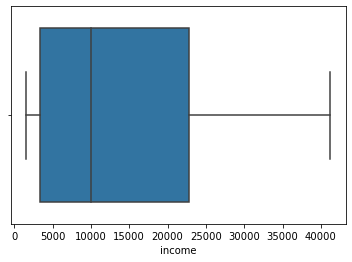

In [ ]:
plt5 = sns.boxplot(data_help['income'])


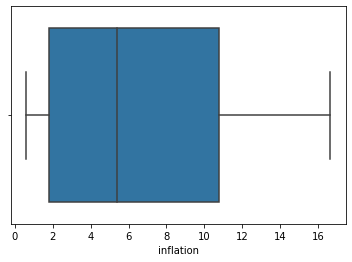

In [ ]:
plt6 = sns.boxplot(data_help['inflation'])


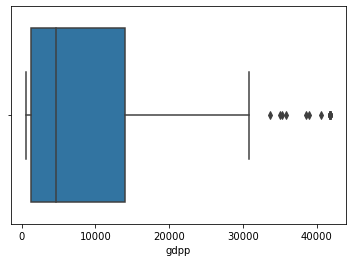

In [ ]:
plt7 = sns.boxplot(data_help['gdpp'])


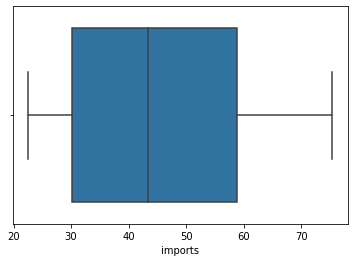

In [ ]:
plt8 = sns.boxplot(data_help['imports'])


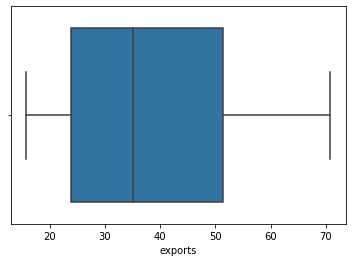

In [ ]:
plt9 = sns.boxplot(data_help['exports'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
X = data_help.drop(['country'],axis=1)

# Putting response variable to y
y = data_help['country']

In [ ]:
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [ ]:
pca.components_

array([[-1.11019785e-03,  3.80857731e-04,  4.30085580e-05,
        -2.80435010e-05,  7.01938448e-01, -8.74110845e-05,
         2.90368401e-04, -4.08181905e-05,  7.12236577e-01],
       [-2.72265788e-03,  2.18386753e-03, -2.43310606e-04,
         4.38166609e-04,  7.12229787e-01,  4.82108601e-04,
         3.94728304e-04, -1.13184971e-04, -7.01937245e-01],
       [ 9.38321933e-01, -1.27038669e-01, -1.49746075e-02,
        -2.67197918e-01,  2.91740381e-03,  7.53989511e-02,
        -1.58007350e-01,  3.36554618e-02, -1.27869813e-03],
       [ 2.79051885e-01,  6.42639473e-01, -4.71280886e-03,
         7.08844852e-01, -5.74363522e-04, -3.56046988e-02,
        -7.28888986e-02,  8.94405620e-03,  7.11442091e-04],
       [ 9.35059481e-02, -7.40851795e-01,  9.41173123e-02,
         6.23494995e-01,  1.50164498e-03, -2.11165738e-01,
        -1.37158071e-02, -2.99146492e-03, -9.39650807e-04],
       [ 6.19163515e-02,  1.29914262e-01, -2.77032848e-03,
        -1.80031780e-01,  2.04955462e-04, -9.675044

In [ ]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.001110,-0.002723,child_mort
1,0.000381,0.002184,exports
2,0.000043,-0.000243,health
3,-0.000028,0.000438,imports
4,0.701938,0.712230,income


In [ ]:
pca.explained_variance_ratio_

array([9.73913624e-01, 2.60833291e-02, 1.65860463e-06, 1.08437956e-06,
       2.21460341e-07, 5.06112150e-08, 2.17276831e-08, 8.75361742e-09,
       8.84024025e-10])

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [ ]:
df_pca = pca_final.fit_transform(X)
df_pca.shape


4


In [ ]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-17317.417573,-2092.724000,30.734854,1.080234
1,-8987.075954,1379.149367,-24.475442,-12.392242
2,-6638.799776,3234.747213,-2.030589,-16.694112
3,-12214.826032,-1098.207344,43.777799,31.780397
4,3225.951992,2217.644144,-19.266943,4.979117


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(df_pca)

0.8394059577520223

In [ ]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')



In [ ]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-17317.417573,-2092.724000,30.734854,1.080234,0
1,-8987.075954,1379.149367,-24.475442,-12.392242,0
2,-6638.799776,3234.747213,-2.030589,-16.694112,0
3,-12214.826032,-1098.207344,43.777799,31.780397,0
4,3225.951992,2217.644144,-19.266943,4.979117,0


In [ ]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-17317.417573,-2092.724000,30.734854,1.080234,0
1,Albania,-8987.075954,1379.149367,-24.475442,-12.392242,0
2,Algeria,-6638.799776,3234.747213,-2.030589,-16.694112,0
3,Angola,-12214.826032,-1098.207344,43.777799,31.780397,0
4,Antigua and Barbuda,3225.951992,2217.644144,-19.266943,4.979117,0


In [ ]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())


In [ ]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,47.632283,35.631488,6.351339,45.951700,8403.645669,8.916370,67.808661,3.270079,4378.062992
1,1,4.981481,57.374074,8.945185,48.074074,50988.888889,2.984481,80.522222,1.775556,49114.814815
2,2,15.946154,60.838462,6.929231,53.600000,32246.153846,6.662000,76.692308,2.236154,21761.538462
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#under developed countries
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Lithuania', 'Macedonia, FYR', 'Madagascar',
       'Malawi', 'Malay

In [ ]:
#developing countries
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Netherlands',
       'New Zealand', 'Norway', 'Qatar', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [ ]:
#developing countries
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

In [ ]:
#We used this type of clustering because we exactly knew that we need 3 clusters and there was a clear relationship
#between features and observations obtained through the insight of the data.